In [33]:
import pandas as pd
dates = pd.read_csv('dates.csv')
markets = pd.read_csv('markets.csv')
products = pd.read_csv('products.csv')
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('transactions.csv')

In [34]:
dates

,date,cy_date,year,month_name,date_yy_mmm
0,01-06-2017,01-06-2017,2017,June,17-Jun\r
1,02-06-2017,01-06-2017,2017,June,17-Jun\r
2,03-06-2017,01-06-2017,2017,June,17-Jun\r
3,04-06-2017,01-06-2017,2017,June,17-Jun\r
4,05-06-2017,01-06-2017,2017,June,17-Jun\r
...,...,...,...,...,...
1121,26-06-2020,01-06-2020,2020,June,20-Jun\r
1122,27-06-2020,01-06-2020,2020,June,20-Jun\r
1123,28-06-2020,01-06-2020,2020,June,20-Jun\r
1124,29-06-2020,01-06-2020,2020,June,20-Jun\r


In [35]:
transactions

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price
0,Prod279,Cus020,Mark011,11-10-2017,1,102,INR,0.39,39.78,62.22
1,Prod279,Cus020,Mark011,18-10-2017,1,102,INR,-0.12,-12.24,114.24
2,Prod279,Cus020,Mark011,19-10-2017,1,102,INR,0.29,29.58,72.42
3,Prod279,Cus020,Mark011,08-11-2017,1,102,INR,0.36,36.72,65.28
4,Prod279,Cus020,Mark011,09-03-2018,1,102,INR,-0.35,-35.70,137.70
...,...,...,...,...,...,...,...,...,...,...
148390,Prod124,Cus006,Mark004,11-06-2020,40,14815,INR,0.07,1037.05,13777.95
148391,Prod252,Cus006,Mark004,12-06-2020,40,6676,INR,0.00,0.00,6676.00
148392,Prod117,Cus006,Mark004,17-06-2020,40,13384,INR,-0.35,-4684.40,18068.40
148393,Prod329,Cus006,Mark004,17-06-2020,40,157435,INR,0.04,6297.40,151137.60


In [36]:
## merging csv files

In [37]:
#Merge transactions with dates
df = transactions.merge(dates, left_on='order_date', right_on='date', how='left')

In [38]:
#Merge with markets
df = df.merge(markets, left_on='market_code', right_on='markets_code', how='left')


In [39]:
#Merge with products
df = df.merge(products, on='product_code', how='left')


In [40]:
#Merge with customers
df = df.merge(customers, on='customer_code', how='left')


In [41]:
df.shape
df.columns
df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,...,cy_date,year,month_name,date_yy_mmm,markets_code,markets_name,zone,product_type,custmer_name,customer_type
0,Prod279,Cus020,Mark011,11-10-2017,1,102,INR,0.39,39.78,62.22,...,01-10-2017,2017,October,17-Oct\r,Mark011,Nagpur,Central,Distribution\r,Nixon,E-Commerce
1,Prod279,Cus020,Mark011,18-10-2017,1,102,INR,-0.12,-12.24,114.24,...,01-10-2017,2017,October,17-Oct\r,Mark011,Nagpur,Central,Distribution\r,Nixon,E-Commerce
2,Prod279,Cus020,Mark011,19-10-2017,1,102,INR,0.29,29.58,72.42,...,01-10-2017,2017,October,17-Oct\r,Mark011,Nagpur,Central,Distribution\r,Nixon,E-Commerce
3,Prod279,Cus020,Mark011,08-11-2017,1,102,INR,0.36,36.72,65.28,...,01-11-2017,2017,November,17-Nov\r,Mark011,Nagpur,Central,Distribution\r,Nixon,E-Commerce
4,Prod279,Cus020,Mark011,09-03-2018,1,102,INR,-0.35,-35.70,137.70,...,01-03-2018,2018,March,18-Mar\r,Mark011,Nagpur,Central,Distribution\r,Nixon,E-Commerce


In [42]:
df.to_csv('merged_sales_data.csv', index=False)

In [43]:
#finding insights

In [44]:
# Total sales amount
df['sales_amount'].sum()

np.int64(984813463)

In [45]:
# Total porfit
df['profit_margin'].sum()

np.float64(24657068.41)

In [46]:
#number of transaction
len(df)


148395

In [47]:
# sales over time
sales_by_year = df.groupby('year')['sales_amount'].sum().reset_index()
sales_by_year

,year,sales_amount
0,2017,92882653
1,2018,413687163
2,2019,336019102
3,2020,142224545


In [48]:
#sales by month
sales_by_year_month = df.groupby(['year', 'month_name'])['sales_amount'].sum().reset_index()
sales_by_year_month


,year,month_name,sales_amount
0,2017,December,31796676
1,2017,November,34998960
2,2017,October,26087017
3,2018,April,35891903
4,2018,August,39454467
5,2018,December,30404126
6,2018,February,35243966
7,2018,January,42520492
8,2018,July,35975169
9,2018,June,34744297


In [49]:
# daily sales trend
daily_sales = df.groupby('order_date')['sales_amount'].sum().reset_index()
daily_sales.head()

,order_date,sales_amount
0,01-01-2018,3571
1,01-01-2019,574
2,01-01-2020,4824
3,01-02-2018,950049
4,01-02-2019,993690


In [50]:

# Top 10 products
top_products = df.groupby('product_code')['sales_amount'].sum().reset_index()
top_products = top_products.sort_values('sales_amount', ascending=False).head(10)
top_products

,product_code,sales_amount
316,Prod318,68967202
314,Prod316,60883452
322,Prod324,41455364
327,Prod329,34381481
332,Prod334,31468996
330,Prod332,26594157
39,Prod040,23581969
317,Prod319,22188881
302,Prod304,17873777
158,Prod159,17660106


In [51]:
#sales by product
sales_by_product_type = df.groupby('product_type')['sales_amount'].sum().reset_index()
sales_by_product_type.sort_values('sales_amount', ascending=False)

,product_type,sales_amount
1,Own Brand\r,369812648
0,Distribution\r,146039576


In [52]:
#profit by product type
profit_by_product_type = df.groupby('product_type')['profit_margin'].sum().reset_index()
profit_by_product_type.sort_values('profit_margin', ascending=False)

,product_type,profit_margin
1,Own Brand\r,9722555.69
0,Distribution\r,2876558.01


In [53]:
#sales by market
sales_by_market = df.groupby('markets_name')['sales_amount'].sum().reset_index()
sales_by_market.sort_values('sales_amount', ascending=False)


,markets_name,sales_amount
5,Delhi NCR,519514271
10,Mumbai,150084801
0,Ahmedabad,132307441
2,Bhopal,58609861
11,Nagpur,55026321
8,Kochi,18813466
4,Chennai,18042702
7,Kanpur,13582609
6,Hyderabad,7436823
12,Patna,4428393


In [54]:
#sales by zone
sales_by_zone = df.groupby('zone')['sales_amount'].sum().reset_index()
sales_by_zone.sort_values('sales_amount', ascending=False)


,zone,sales_amount
1,North,675532517
0,Central,263720983
2,South,45559963


In [55]:
#profit by zone
profit_by_zone = df.groupby('zone')['profit_margin'].sum().reset_index()
profit_by_zone.sort_values('profit_margin', ascending=False)


,zone,profit_margin
1,North,15076287.62
0,Central,8571899.18
2,South,1008881.61


In [56]:
#top 10 costomer by total spend
top_customers = df.groupby(['customer_code', 'custmer_name'])['sales_amount'].sum().reset_index()
top_customers = top_customers.sort_values('sales_amount', ascending=False).head(10)
top_customers


,customer_code,custmer_name,sales_amount
5,Cus006,Electricalsara Stores,413333588
21,Cus022,Electricalslytical,49644189
2,Cus003,Excel Stores,49115620
4,Cus005,Premium Stores,44906666
19,Cus020,Nixon,43893083
6,Cus007,Info Stores,35100033
26,Cus027,Control,31771997
0,Cus001,Surge Stores,28648916
7,Cus008,Acclaimed Stores,21196727
13,Cus014,Forward Stores,21026079


In [57]:
#customer typewise sales
sales_by_cust_type = df.groupby('customer_type')['sales_amount'].sum().reset_index()
sales_by_cust_type.sort_values('sales_amount', ascending=False)


,customer_type,sales_amount
0,Brick & Mortar,744469838
1,E-Commerce,240343625


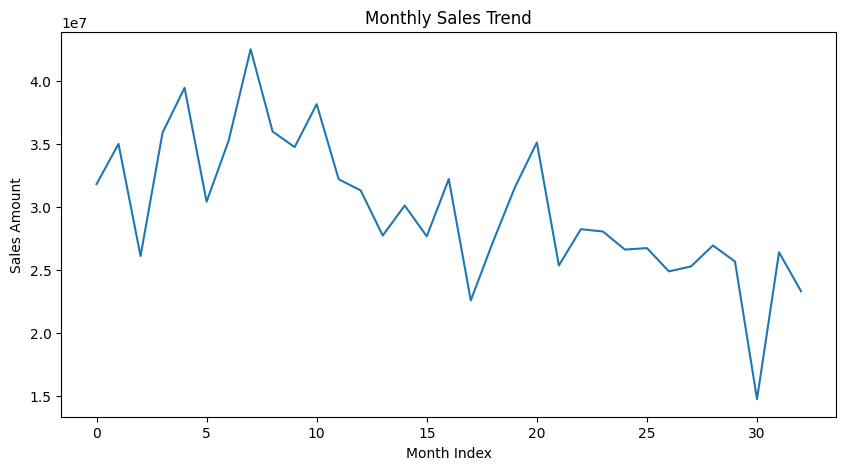

In [58]:
#now lets make some graphs
#monthly sales trend
import matplotlib.pyplot as plt
monthly = df.groupby(['year', 'month_name'])['sales_amount'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(monthly.index, monthly['sales_amount'])
plt.xlabel('Month Index')
plt.ylabel('Sales Amount')
plt.title('Monthly Sales Trend')
plt.show()

) missing from font(s) DejaVu Sans.ms\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


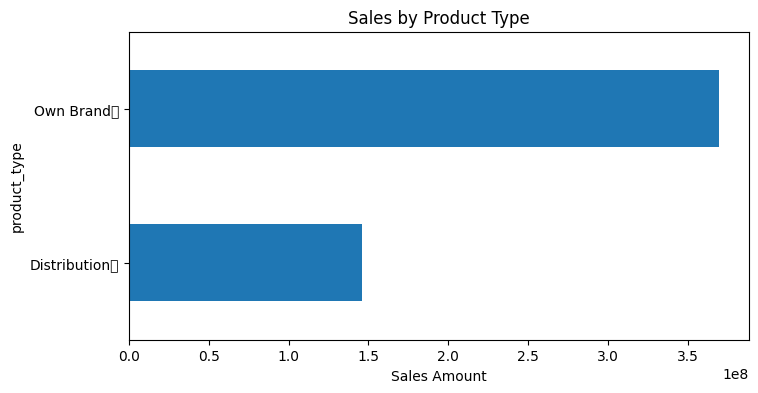

In [59]:
#sales by product type
prod_sales = df.groupby('product_type')['sales_amount'].sum().sort_values()
plt.figure(figsize=(8,4))
prod_sales.plot(kind='barh')
plt.title("Sales by Product Type")
plt.xlabel("Sales Amount")
plt.show()


) missing from font(s) DejaVu Sans.ms\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from font(s) DejaVu Sans.ms\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


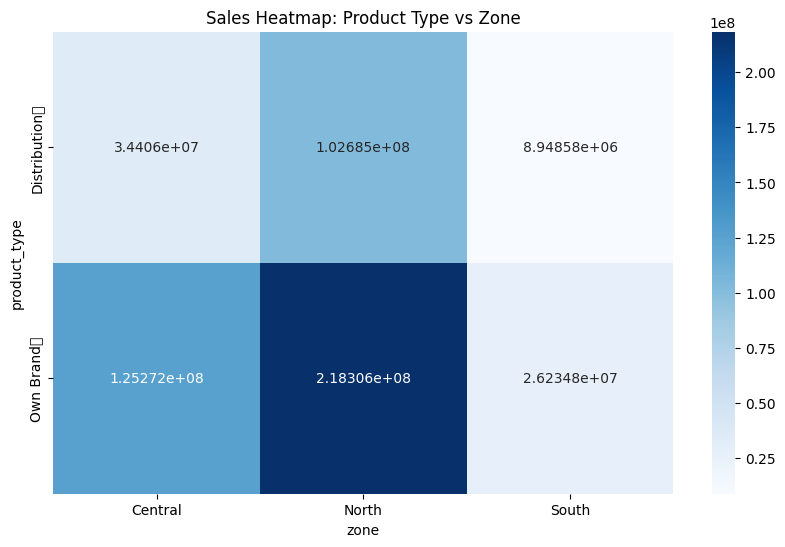

In [60]:
# sales by product vs market (heatmap)
import seaborn as sns
pivot = df.pivot_table(values='sales_amount',
                       index='product_type',
                       columns='zone',
                       aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='g', cmap='Blues')
plt.title("Sales Heatmap: Product Type vs Zone")
plt.show()


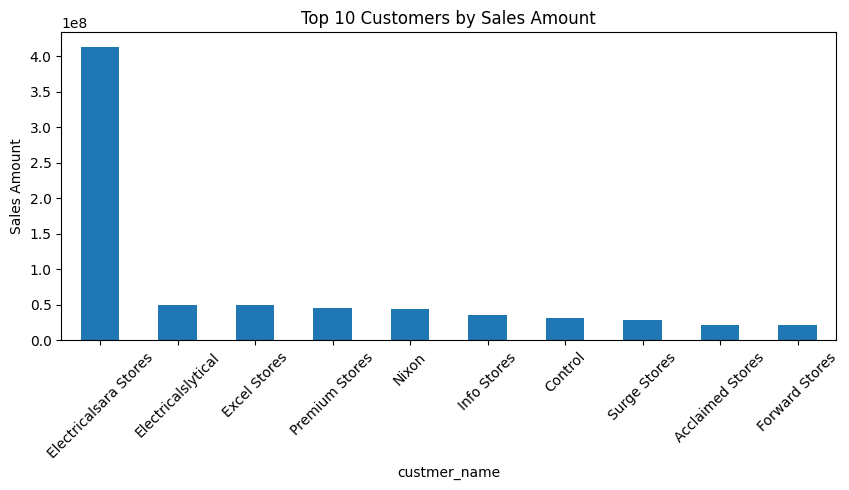

In [61]:
# top 10 customer by revenue
top_customers = df.groupby(['custmer_name'])['sales_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,4))
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Sales Amount")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()

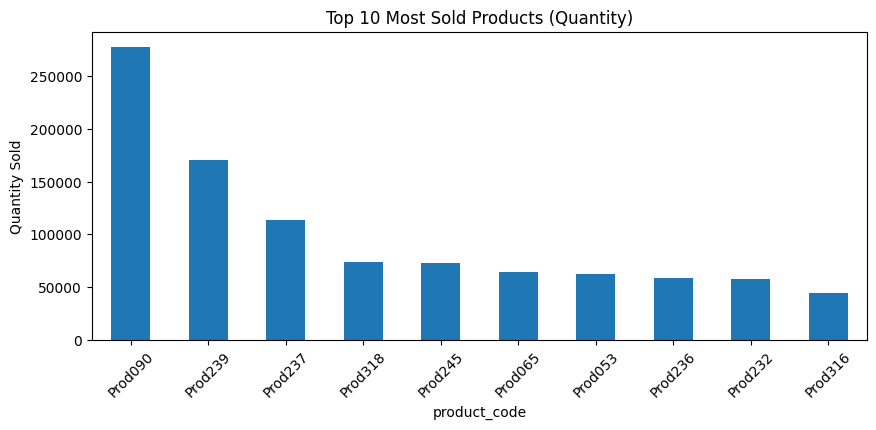

In [62]:
#most sold product
top_qty = df.groupby('product_code')['sales_qty'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,4))
top_qty.plot(kind='bar')
plt.title("Top 10 Most Sold Products (Quantity)")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


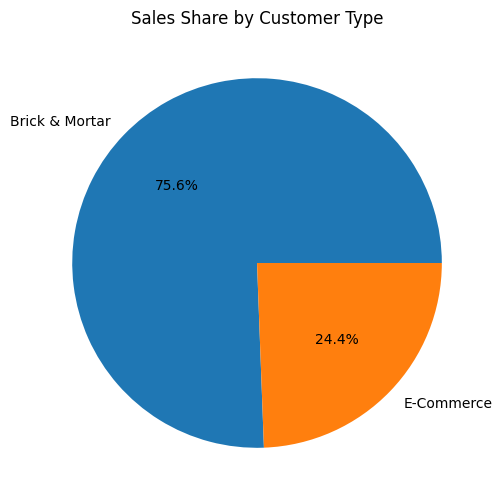

In [63]:
#customer type breakdown
cust_type_counts = df.groupby('customer_type')['sales_amount'].sum()

plt.figure(figsize=(6,6))
plt.pie(cust_type_counts, labels=cust_type_counts.index, autopct='%1.1f%%')
plt.title("Sales Share by Customer Type")
plt.show()